Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv
dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
species = pd.get_dummies(iris['species'], drop_first = True)
iris.drop('species', axis=1, inplace = True)
iris = pd.concat([iris,species],axis=1)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,5.1,3.5,1.4,0.2,False,False
1,4.9,3.0,1.4,0.2,False,False
2,4.7,3.2,1.3,0.2,False,False
3,4.6,3.1,1.5,0.2,False,False
4,5.0,3.6,1.4,0.2,False,False


In [ ]:
X = iris.iloc[:,[0,1,2,3]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y = iris.iloc[:,[4]]
Y.head()

,versicolor
0,False
1,False
2,False
3,False
4,False


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3, random_state=25)


print("Xtrain : ", Xtrain.shape)
print("Xtest : ", Xtest.shape)
print("Ytrain : ", Ytrain.shape)
print("Ytest : ", Ytest.shape)

Xtrain :  (105, 4)
Xtest :  (45, 4)
Ytrain :  (105, 1)
Ytest :  (45, 1)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,Ytrain)

Ypredict = model.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix
CF = confusion_matrix(Ypredict,Ytest)
CF

array([[28,  2],
       [ 1, 14]])

Text(0.5, 23.52222222222222, 'Predicted')

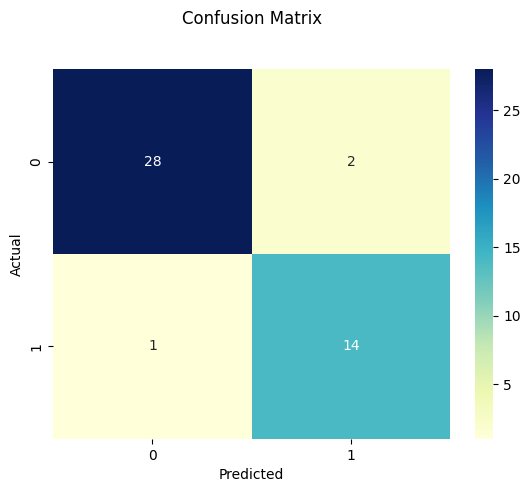

In [ ]:
sns.heatmap(pd.DataFrame(CF), annot=True, cmap = "YlGnBu",fmt='g')
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(Xtest)
accuray = accuracy_score(y_pred, Ytest)
f1 = f1_score(y_pred, Ytest, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9333333333333333
F1 Score: 0.9338436303991252


In [ ]:
errorRate = 1 - accuray
errorRate

0.06666666666666665

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(Ytest,Ypredict)
recall

0.875

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(Ytest,Ypredict)
precision

0.9333333333333333